In [ ]:
# listings_summary_cleaned
# https://drive.google.com/file/d/1UMIqoa1bykZ0KDjIvloM9jAwdiUgFLGv/view?usp=sharing
!gdown --id "1UMIqoa1bykZ0KDjIvloM9jAwdiUgFLGv"

# https://drive.google.com/file/d/1RtujuvdSXTIVFpQLz7aTxvXYSByYQlb-/view?usp=sharing
!gdown --id '1RtujuvdSXTIVFpQLz7aTxvXYSByYQlb-'  # 加Description分數

# https://drive.google.com/file/d/1AvBbKfUV6nHoABVzBLmUStGcn-UV42zr/view?usp=sharing
!gdown --id '1AvBbKfUV6nHoABVzBLmUStGcn-UV42zr'  # 加Description & Review分數

Downloading...
From: https://drive.google.com/uc?id=1UMIqoa1bykZ0KDjIvloM9jAwdiUgFLGv
To: /content/listings_summary_cleaned.csv
100% 14.2M/14.2M [00:00<00:00, 86.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RtujuvdSXTIVFpQLz7aTxvXYSByYQlb-
To: /content/listings_summary_des.csv
100% 32.5M/32.5M [00:00<00:00, 89.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AvBbKfUV6nHoABVzBLmUStGcn-UV42zr
To: /content/listings_summary_cleaned_text.csv
100% 17.5M/17.5M [00:00<00:00, 154MB/s]


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('listings_summary_cleaned_text.csv', index_col=0)
df.drop(['id'], axis=1, inplace=True)
df.drop(['host_id'], axis=1, inplace=True)
df.fillna(0, inplace=True)
print(df.shape)
df.head(1)

(21936, 259)


,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,neighbourhood_Charlottenburg,neighbourhood_Friedrichshain,neighbourhood_Kreuzberg,neighbourhood_Mitte,neighbourhood_Moabit,neighbourhood_Neukölln,neighbourhood_Pankow,neighbourhood_Prenzlauer Berg,neighbourhood_Rummelsburg,neighbourhood_Schöneberg,neighbourhood_Tempelhof,neighbourhood_Wedding,neighbourhood_Wilmersdorf,neighbourhood_nan,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_neighbourhood_Charlottenburg,host_neighbourhood_Friedrichshain,host_neighbourhood_Kreuzberg,host_neighbourhood_Mitte,host_neighbourhood_Moabit,host_neighbourhood_Neukölln,host_neighbourhood_Pankow,host_neighbourhood_Prenzlauer Berg,host_neighbourhood_Schöneberg,host_neighbourhood_Tempelhof,host_neighbourhood_Wedding,host_neighbourhood_Wilmersdorf,neighbourhood_cleansed_Alexanderplatz,neighbourhood_cleansed_Brunnenstr. Nord,neighbourhood_cleansed_Brunnenstr. Süd,neighbourhood_cleansed_Frankfurter Allee Nord,neighbourhood_cleansed_Frankfurter Allee Süd FK,neighbourhood_cleansed_Helmholtzplatz,neighbourhood_cleansed_Karl-Marx-Allee-Nord,neighbourhood_cleansed_Karl-Marx-Allee-Süd,neighbourhood_cleansed_Moabit Ost,neighbourhood_cleansed_Moabit West,neighbourhood_cleansed_Neu Lichtenberg,neighbourhood_cleansed_Neuköllner Mitte/Zentrum,neighbourhood_cleansed_Osloer Straße,neighbourhood_cleansed_Parkviertel,neighbourhood_cleansed_Prenzlauer Berg Nord,neighbourhood_cleansed_Prenzlauer Berg Nordwest,neighbourhood_cleansed_Prenzlauer Berg Ost,neighbourhood_cleansed_Prenzlauer Berg Süd,neighbourhood_cleansed_Prenzlauer Berg Südwest,neighbourhood_cleansed_Reuterstraße,neighbourhood_cleansed_Rixdorf,neighbourhood_cleansed_Schillerpromenade,neighbourhood_cleansed_Schöneberg-Nord,neighbourhood_cleansed_Schöneberg-Süd,neighbourhood_cleansed_Südliche Friedrichstadt,neighbourhood_cleansed_Tempelhof,neighbourhood_cleansed_Tempelhofer Vorstadt,neighbourhood_cleansed_Wedding Zentrum,neighbourhood_cleansed_nördliche Luisenstadt,neighbourhood_cleansed_südliche Luisenstadt,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,zipcode_1011,zipcode_1017,zipcode_1024,zipcode_1031,zipcode_1040,zipcode_1043,zipcode_1055,zipcode_1058,zipcode_1062,zipcode_1071,zipcode_1077,zipcode_1078,zipcode_1082,zipcode_1096,zipcode_1099,zipcode_1204,zipcode_1205,zipcode_1243,zipcode_1318,zipcode_1334,zipcode_1335,zipcode_1405,zipcode_nan,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_government_id,host_verifications_identity_manual,host_verifications_jumio,host_verifications_kba,host_verifications_manu

# Training

In [ ]:
y = df['price']
x = df.drop(['price'], axis=1)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# 70% train, 10% valid, 10% test, 10% stacking
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.125, random_state=42)
x_test, x_stack, y_test, y_stack = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

### Use y log model

In [ ]:
# Use y_train_log
y_train_log = np.log(y_train[y_train > 0])
x_train_ylog = x_train.loc[y_train[y_train > 0].index]

### Feature Selection

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestRegressor(n_estimators=400, random_state=30))
rf = sel.fit(x_train_ylog, y_train_log)

In [ ]:
# make a list and count the selected features
selected_feat = x_train_ylog.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

37
Index(['host_since', 'latitude', 'longitude', 'accommodates', 'bathrooms',
       'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'calculated_host_listings_count', 'reviews_per_month',
       'neighbourhood_Mitte', 'property_type_Apartment',
       'room_type_Private room', 'room_type_Shared room',
       'host_verifications_way_num', 'amenities_way_num', 'des_pc0', 'des_pc1',
       'des_pc2', 'des_pc3', 'des_pc4', 'des_pc5', 'des_pc6', 'des_pc7',
       'des_afinn_score', 'reviews_afinn_score'],
      dtype='object')


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
x_col, imp = list(sel.feature_names_in_), list(sel.estimator_.feature_importances_)
pd.DataFrame({'x': x_col, 'Importance': imp}).sort_values(by='Importance', ascending=False)[:38]

,x,Importance
117,room_type_Private room,0.275
10,accommodates,0.073
12,bedrooms,0.045
11,bathrooms,0.037
15,cleaning_fee,0.027
118,room_type_Shared room,0.025
22,availability_30,0.023
251,des_pc3,0.022
7,latitude,0.022
23,availability_60,0.021


#### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNetCV
ratios = np.arange(0, 1, 0.01)
alphas = np.arange(-5, 2)
model = ElasticNetCV(l1_ratio = ratios, alphas = alphas, cv=5, n_jobs=-1).fit(x_train_ylog, y_train_log)
print(model.alpha_, model.l1_ratio_)
elastic_variables = x_train_ylog.columns[model.coef_ != 0]
print(len(elastic_variables))
print(elastic_variables)

-1 0.0
0
Index([], dtype='object')


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
x_col, imp = list(x_train_ylog.columns), list(model.coef_)
pd.DataFrame({"x": x_col, "Coef": imp}).sort_values(by="Coef",ascending=False)[:20]

,x,Coef
34,requires_license,0.806
193,amenities_Gym,0.453
160,amenities_Airconditioning,0.377
53,neighbourhood_Wilmersdorf,0.271
51,neighbourhood_Tempelhof,0.224
109,neighbourhood_group_cleansed_Mitte,0.224
74,neighbourhood_cleansed_Frankfurter Allee Süd FK,0.212
76,neighbourhood_cleansed_Karl-Marx-Allee-Nord,0.208
87,neighbourhood_cleansed_Prenzlauer Berg Süd,0.203
41,neighbourhood_Charlottenburg,0.192


#### Lasso

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

lasso_cv = linear_model.LassoCV(cv=5,random_state=30, max_iter=5000).fit(x_train_ylog, y_train_log)
lasso_variables = x_train_ylog.columns[lasso_cv.coef_ != 0]
print(lasso_variables)
print(len(lasso_variables))

pd.set_option('display.float_format', lambda x: '%.3f' %x)
x_col, imp = list(x_train_ylog.columns), list(lasso_cv.coef_)
pd.DataFrame({"x": x_col, "Coef": imp}).sort_values(by="Coef",ascending=False)[:6]

Index(['host_since', 'security_deposit', 'cleaning_fee', 'maximum_nights',
       'calendar_updated', 'availability_365'],
      dtype='object')
6


,x,Coef
15,cleaning_fee,0.001
25,availability_365,0.001
14,security_deposit,0.000
0,host_since,0.000
166,amenities_Buildingstaff,0.000
167,amenities_Buzzer/wirelessintercom,0.000


## Feature Selection - Evaluation
 - Random Forest: selected_variable
 - ElasticNet: elastic_variable
 - Lasso: lasso_variables

由於ElasticNet只篩除2個變數(254個)，Lasso則是只留下6個變數，n_estimators=400的Random Forest則是40個，在變數的挑選上，Random Forest的數量可能是較合理的。
我們也嘗試把三種Feature Selection的結果都丟進模型中去跑看Validation，發現Random Forest和Elastic Net結果不相上下，因此最後選擇了有效篩選feature的Random Forest作為主要Feature Selection。

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

### Random Forest

In [ ]:
x_train, x_test, x_valid, x_stack = x_train[selected_feat], x_test[selected_feat], x_valid[selected_feat], x_stack[selected_feat]

In [ ]:
# Linear
lr_log = LinearRegression().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(lr_log.predict(x_valid))
print(y_valid_pred)
print("Linear:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# Lasso
# y_log
lasso = Lasso(positive=True).fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = lasso.predict(x_valid)
print(y_valid_pred)
print("Lasso:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))


# Ridge
# y_log
ridge_log = Ridge().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(ridge_log.predict(x_valid))
print(y_valid_pred)
print("Ridge:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# Random Forest
rf_log = RandomForestRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(rf_log.predict(x_valid))
print(y_valid_pred)
print("Random Forest:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# Gradient Boosting Regressor
gb_log = GradientBoostingRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(gb_log.predict(x_valid))
print(y_valid_pred)
print("Gradient Boosting Regressor:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# XGBoost
xg_log = xgb.XGBRegressor(eval_metric='mae').fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(xg_log.predict(x_valid))
print(y_valid_pred)
print("XGBoost:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))


[118.30673171  74.16271971  28.43561822 ... 102.96636252  55.29926714
  30.92218642]
Linear:
MAE 20.5416
RMSE 76.5731
[4.02837779 3.95513669 3.71277489 ... 4.02720119 4.02631009 3.8356948 ]
Lasso:
MAE 57.6218
RMSE 102.9762
[118.27122633  74.16562401  28.42819675 ... 102.97050119  55.27447192
  30.94021677]
Ridge:
MAE 20.5421
RMSE 76.5782
[111.81683796  82.31201382  30.65260833 ... 109.55441974  54.21455332
  25.83497989]
Random Forest:
MAE 18.4188
RMSE 73.1571
[109.69865127  81.19093182  26.28192224 ... 110.02580406  59.05994201
  27.71118995]
Gradient Boosting Regressor:
MAE 18.5876
RMSE 72.8316
[07:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[111.63437   80.438515  25.98295  ... 111.45859   59.64546   29.351103]
XGBoost:
MAE 18.7083
RMSE 72.4802


### ElasticNet variables

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.125, random_state=42)
x_test, x_stack, y_test, y_stack = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
y_train_log = np.log(y_train[y_train > 0])
x_train_ylog = x_train.loc[y_train[y_train > 0].index]
x_train, x_test, x_valid, x_stack = x_train[elastic_variables], x_test[elastic_variables], x_valid[elastic_variables], x_stack[elastic_variables]

In [ ]:
# Linear
lr_log = LinearRegression().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(lr_log.predict(x_valid))
print(y_valid_pred)
print("Linear:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# Lasso
# y_log
from sklearn.linear_model import Lasso

lasso = Lasso(positive=True).fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = lasso.predict(x_valid)
print(y_valid_pred)
print("Lasso:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))


# Ridge
# y_log
from sklearn.linear_model import Ridge
ridge_log = Ridge().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(ridge_log.predict(x_valid))
print(y_valid_pred)
print("Ridge:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# Random Forest
rf_log = RandomForestRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(rf_log.predict(x_valid))
print(y_valid_pred)
print("Random Forest:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# Gradient Boosting Regressor
gb_log = GradientBoostingRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(gb_log.predict(x_valid))
print(y_valid_pred)
print("Gradient Boosting Regressor:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# XGBoost
xg_log = xgb.XGBRegressor(eval_metric='mae').fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(xg_log.predict(x_valid))
print(y_valid_pred)
print("XGBoost:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[ 70.69866746 127.04619701  25.8765427  ...  36.32890492  40.57913982
  37.99944694]
Linear:
MAE 25.9518
RMSE 188.1486
[3.68315644 3.99441541 3.65923414 ... 3.79301519 3.85965015 3.77059277]
Lasso:
MAE 61.9861
RMSE 204.5468
[ 70.73162524 127.06225194  25.84129462 ...  36.38475439  40.6150373
  37.97991809]
Ridge:
MAE 25.9520
RMSE 188.4093
[ 64.35310205 114.90398098  27.32314644 ...  44.34193499  45.66762985
  35.85476664]
Random Forest:
MAE 18.5155
RMSE 66.8954
[ 62.3770126  119.49317961  29.25352686 ...  47.58828991  47.92366281
  34.48805838]
Gradient Boosting Regressor:
MAE 20.8613
RMSE 125.5368
[13:40:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 59.942924 116.973915  28.970476 ...  48.66079   47.492943  34.50936 ]
XGBoost:
MAE 20.9308
RMSE 126.2815


### Lasso

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.125, random_state=42)
x_test, x_stack, y_test, y_stack = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
y_train_log = np.log(y_train[y_train > 0])
x_train_ylog = x_train.loc[y_train[y_train > 0].index]
x_train, x_test, x_valid, x_stack = x_train[lasso_variables], x_test[lasso_variables], x_valid[lasso_variables], x_stack[lasso_variables]

In [ ]:
# Linear
lr_log = LinearRegression().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(lr_log.predict(x_valid))
print(y_valid_pred)
print("Linear:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# Lasso
# y_log
from sklearn.linear_model import Lasso

lasso = Lasso(positive=True).fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = lasso.predict(x_valid)
print(y_valid_pred)
print("Lasso:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))


# Ridge
# y_log
from sklearn.linear_model import Ridge
ridge_log = Ridge().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(ridge_log.predict(x_valid))
print(y_valid_pred)
print("Ridge:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# Random Forest
rf_log = RandomForestRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(rf_log.predict(x_valid))
print(y_valid_pred)
print("Random Forest:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# Gradient Boosting Regressor
gb_log = GradientBoostingRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(gb_log.predict(x_valid))
print(y_valid_pred)
print("Gradient Boosting Regressor:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

# XGBoost
xg_log = xgb.XGBRegressor(eval_metric='mae').fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(xg_log.predict(x_valid))
print(y_valid_pred)
print("XGBoost:")
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[38.92339245 57.56506853 38.1778296  ... 41.38391021 43.69090883
 40.95533235]
Linear:
MAE 33.0705
RMSE 197.2072
[3.69092252 4.01224798 3.66926676 ... 3.73336118 3.80615181 3.75600364]
Lasso:
MAE 61.9858
RMSE 204.5487
[38.92339293 57.56506716 38.17782996 ... 41.38391047 43.69090974
 40.95533345]
Ridge:
MAE 33.0705
RMSE 197.2072
[38.31582408 61.93843497 29.17509539 ... 27.91128991 36.5926432
 50.23530782]
Random Forest:
MAE 27.4888
RMSE 144.2865
[35.41070039 66.26880881 33.75322434 ... 35.21116658 45.60705403
 55.53887882]
Gradient Boosting Regressor:
MAE 30.4509
RMSE 184.6454
[13:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[35.376503 66.28888  33.633    ... 36.761364 45.03749  55.22077 ]
XGBoost:
MAE 30.5449
RMSE 187.0946


## Model Evaluation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.125, random_state=42)
x_test, x_stack, y_test, y_stack = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
y_train_log = np.log(y_train[y_train > 0])
x_train_ylog = x_train.loc[y_train[y_train > 0].index]
x_train, x_test, x_valid, x_stack = x_train[selected_feat], x_test[selected_feat], x_valid[selected_feat], x_stack[selected_feat]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

#### Linear Regression - rf

In [ ]:
lr = LinearRegression(positive=True).fit(x_train, y_train)
y_valid_pred = lr.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[144.5784507   78.4018113   11.11534215 ... 114.98837994  68.25780261
  31.95527155]
MAE 24.1594
RMSE 76.5549


模型表現非常差，且預測結果有部分為負值，因此可轉換y，使模型不會預測出負數的結果

In [ ]:
lr_log = LinearRegression().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(lr_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[118.30673171  74.16271971  28.43561822 ... 102.96636252  55.29926714
  30.92218642]
MAE 20.5416
RMSE 76.5731


#### Lasso - rf

In [ ]:
lasso = Lasso(positive=True).fit(x_train, y_train)
y_valid_pred = lasso.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[129.01981067  82.37312029  12.66808775 ... 114.31599009  65.13869173
  34.78703812]
MAE 24.0306
RMSE 77.4498


In [ ]:
# y_log
lasso = Lasso(positive=True).fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = lasso.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[4.02837779 3.95513669 3.71277489 ... 4.02720119 4.02631009 3.8356948 ]
MAE 57.6218
RMSE 102.9762


#### Ridge - rf

In [ ]:
ridge = Ridge(positive=True).fit(x_train, y_train)
y_valid_pred = ridge.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[58.51404152 50.98094362 50.75386637 ... 59.26024689 83.62041446
 68.22393906]
MAE 30.8666
RMSE 83.9585


In [ ]:
# y_log
ridge_log = Ridge().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(ridge_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[118.27122633  74.16562401  28.42819675 ... 102.97050119  55.27447192
  30.94021677]
MAE 20.5421
RMSE 76.5782


#### Random Forest - rf

In [ ]:
rf = RandomForestRegressor().fit(x_train, y_train)
y_valid_pred = rf.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[113.22  83.73  34.42 ... 116.87  70.47  27.93]
MAE 20.0563
RMSE 73.0865


In [ ]:
# y_log
rf_log = RandomForestRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(rf_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[108.76963973  84.7744942   32.08450208 ... 117.28529335  55.63207747
  24.82692924]
MAE 18.3601
RMSE 72.9509


#### Gradient Boosting Regressor - rf

In [ ]:
gb = GradientBoostingRegressor().fit(x_train, y_train)
y_valid_pred = gb.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[120.14241608  78.85300315  33.29659869 ... 111.35588744  64.23735548
  33.98430421]
MAE 19.8989
RMSE 71.9480


In [ ]:
# y_log
gb_log = GradientBoostingRegressor().fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(gb_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[109.69865127  81.19093182  26.28192224 ... 110.02580406  59.05994201
  27.71118995]
MAE 18.5662
RMSE 72.8171


#### XGBoost - rf

In [ ]:
xg = xgb.XGBRegressor(eval_metric='mae').fit(x_train, y_train)
y_valid_pred = xg.predict(x_valid)
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[16:33:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[124.80225   77.57628   33.14533  ... 107.537766  63.181225  34.17374 ]
MAE 20.1658
RMSE 73.1090


In [ ]:
# y_log
xg_log = xgb.XGBRegressor(eval_metric='mae').fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(xg_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

[16:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[111.63437   80.438515  25.98295  ... 111.45859   59.64546   29.351103]
MAE 18.7083
RMSE 72.4802


### Conclusion
價格的預測在經濟研究上時常以log變數來衡量彈性變化，也避免所衡量的數值產生負值問題，因此log表現整體來說較一搬變數好。以下我們使用log變數。

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  StratifiedKFold, GridSearchCV
import numpy as np
import pandas as pd
import math
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [ ]:
tmp_x_train = x_train.loc[y_train[y_train > 0].index]
tmp_x_valid = x_valid.loc[y_valid[y_valid > 0].index]
y_train_log = np.log(y_train[y_train > 0])
y_valid_log = np.log(y_valid[y_valid > 0])

#### Random Forest

In [ ]:
log_y = np.log(y[y > 0])
log_x = x.loc[y[y > 0].index] #不能跑log

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test = x_train[selected_feat], x_test[selected_feat]

In [ ]:
random_state = 42
rf = RandomForestRegressor(random_state=random_state)
rf_param_grid = {"n_estimators": [100,300],
                "criterion":["squared_error"],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[True]}

In [ ]:
reg = GridSearchCV( estimator=rf, 
                    param_grid=rf_param_grid, 
                    cv = StratifiedKFold(n_splits = 10), 
                    scoring = "neg_mean_absolute_error", n_jobs = -1, verbose = 1)
                    # verbose: Controls the verbosity: the higher, the more messages.
reg.fit(x_train,y_train)
print(reg.best_score_)
print(reg.best_estimator_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


KeyboardInterrupt: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.125, random_state=42)
x_test, x_stack, y_test, y_stack = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
y_train_log = np.log(y_train[y_train > 0])
x_train_ylog = x_train.loc[y_train[y_train > 0].index]
x_train, x_test, x_valid, x_stack = x_train[selected_feat], x_test[selected_feat], x_valid[selected_feat], x_stack[selected_feat]

rf_log = RandomForestRegressor(min_samples_leaf=3, n_estimators=300, random_state=42).fit(x_train.loc[y_train[y_train > 0].index], y_train_log)
y_valid_pred = np.exp(rf_log.predict(x_valid))
print(y_valid_pred)
print('MAE {:.4f}'.format(mae(y_valid, y_valid_pred)))
print('RMSE {:.4f}'.format(mse(y_valid, y_valid_pred, squared=False)))

#### Gradient Boosting

In [ ]:
def tune_gradient_boosting(x_train, x_valid, y_train, y_valid, learning_rate, mae_dct, log):
    for lr in learning_rate:
        clf = GradientBoostingRegressor(n_estimators=800, learning_rate=lr, random_state=0)
        clf = clf.fit(x_train, y_train)
        if log == True:
            y_pred = np.exp(clf.predict(x_valid))
        else:
            y_pred = clf.predict(x_valid)

        for y_pred in clf.staged_predict(x_valid):
            mae_dct[str(lr)].append(mae(y_valid, y_pred))

    best_mae = 1000
    best_lr = 1000
    best_n = 1000

    for lr in learning_rate:
        for n, current_mae in enumerate(mae_dct[str(lr)]):
            if current_mae < best_mae:
                best_mae = current_mae
                best_lr = lr
                best_n = n
    print("The best learning rate is {} and the best number of stage is {}".format(best_lr, best_n)) 
    print(mae_dct[str(best_lr)][best_n])

    import matplotlib.pyplot as plt
    for lr in learning_rate:
        plt.plot(mae_dct[str(lr)], label='lr: {}'.format(lr))

    plt.xlabel("log number of stage")
    plt.ylabel("MAE")
    plt.legend()

The best learning rate is 0.46415888336127775 and the best number of stage is 686
57.61202837420308


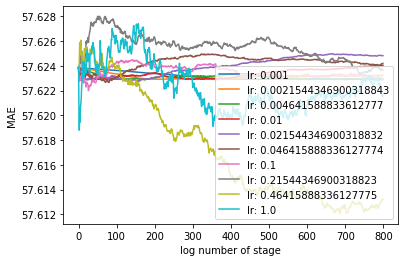

In [ ]:
learning_rate = np.logspace(-3, 0, 10, endpoint=True)
mae_dct = {}
for lr in learning_rate :
    mae_dct[str(lr)] = []

tune_gradient_boosting(tmp_x_train, tmp_x_valid, y_train_log, y_valid, learning_rate, mae_dct, True)

# Stacking

## Training Again with Training and Validation Data

In [ ]:
x_train_valid = pd.concat([x_train, x_valid])
y_train_valid = pd.concat([y_train, y_valid])
y_train_valid_log = np.log(y_train_valid[y_train_valid > 0])

In [ ]:
# 1. Linear Log
lr_log = LinearRegression().fit(x_train_valid.loc[y_train_valid[y_train_valid > 0].index], y_train_valid_log)

# 2. Lasso Log
lasso_log = Lasso().fit(x_train_valid.loc[y_train_valid[y_train_valid > 0].index], y_train_valid_log)

# 3. Ridge Log
ridge_log = Ridge().fit(x_train_valid.loc[y_train_valid[y_train_valid > 0].index], y_train_valid_log)

# 4. RandomForest Log
# rf_log = RandomForestRegressor().fit(x_train_valid.loc[y_train_valid[y_train_valid > 0].index], y_train_valid_log)
rf_log = RandomForestRegressor(min_samples_leaf=3, n_estimators=300, random_state=42).fit(x_train_valid.loc[y_train_valid[y_train_valid > 0].index], y_train_valid_log)

# 5. Gradient Boosting Regressor
gb = GradientBoostingRegressor(learning_rate=0.464, n_estimators=485).fit(x_train_valid, y_train_valid)

# 6. XGBoost
xg = xgb.XGBRegressor(eval_metric='mae').fit(x_train_valid, y_train_valid)

[07:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Start Stacking

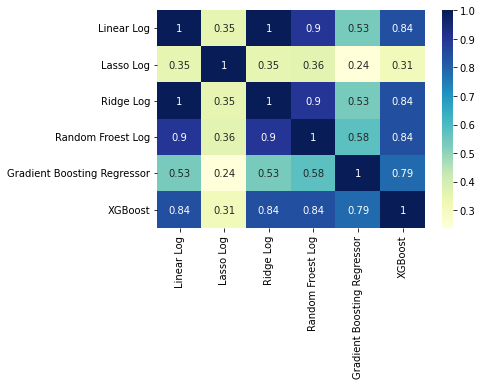

In [ ]:
# 觀察各模型的相似程度
x_stack_df = pd.DataFrame({
    'Linear Log': np.exp(lr_log.predict(x_stack)),
    'Lasso Log': np.exp(lasso_log.predict(x_stack)),
    'Ridge Log': np.exp(ridge_log.predict(x_stack)),
    'Random Froest Log': np.exp(rf_log.predict(x_stack)),
    'Gradient Boosting Regressor': gb.predict(x_stack),
    'XGBoost': xg.predict(x_stack)
})
sns.heatmap(x_stack_df.corr(), annot=True, cmap='YlGnBu')

1. Linear和Ridge太相似，所以丟掉Ridge
2. Gradient Boosting Regressor和XGBoost太相似，所以丟掉XGBoost

In [ ]:
# 觀察各模型的相似程度
x_stack_df = pd.DataFrame({
    'Linear Log': np.exp(lr_log.predict(x_stack)),
    'Lasso Log': np.exp(lasso_log.predict(x_stack)),
    'Random Froest Log': np.exp(rf_log.predict(x_stack)),
    'Gradient Boosting Regressor': gb.predict(x_stack)
})

In [ ]:
stack = LinearRegression().fit(x_stack_df, y_stack)
print(stack.coef_)

[-0.19596422 -0.31970941  1.40543683  0.31821955]


### Testing Data

In [ ]:
x_test_df = pd.DataFrame({
    'Linear Log': np.exp(lr_log.predict(x_test)),
    'Lasso Log': np.exp(lasso_log.predict(x_test)),
    'Random Froest Log': np.exp(rf_log.predict(x_test)),
    'Gradient Boosting Regressor': gb.predict(x_test),
})
x_test_df

,Linear Log,Lasso Log,Random Froest Log,Gradient Boosting Regressor
0,113.922,48.697,293.431,295.179
1,31.933,38.906,30.661,29.428
2,66.834,44.008,61.849,73.257
3,59.980,57.474,69.357,74.971
4,68.176,53.635,70.900,60.946
...,...,...,...,...
2189,71.520,54.074,75.131,79.237
2190,54.619,61.079,35.997,95.476
2191,38.790,40.179,41.486,51.809
2192,27.255,40.141,27.579,27.573


In [ ]:
print('Linear MAE {:.4f} '.format(mae(y_test, np.exp(lr_log.predict(x_test)))))
print('Linear RMSE {:.4f}'.format(mse(y_test, np.exp(lr_log.predict(x_test)), squared=False)))
print('Lasso MAE {:.4f} '.format(mae(y_test, np.exp(lasso_log.predict(x_test)))))
print('Lasso RMSE {:.4f}'.format(mse(y_test, np.exp(lasso_log.predict(x_test)), squared=False)))
print('Ridge MAE {:.4f}'.format(mae(y_test, np.exp(ridge_log.predict(x_test)))))
print('Ridge RMSE {:.4f}'.format(mse(y_test, np.exp(ridge_log.predict(x_test)), squared=False)))
print('Random Forest MAE {:.4f} '.format(mae(y_test, np.exp(rf_log.predict(x_test)))))
print('Random Forest RMSE {:.4f}'.format(mse(y_test, np.exp(rf_log.predict(x_test)), squared=False)))
print('Gradient Boosting Regressor MAE {:.4f} '.format(mae(y_test, gb.predict(x_test))))
print('Gradient Boosting Regressor RMSE {:.4f}'.format(mse(y_test, gb.predict(x_test), squared=False)))
print('XGBoost MAE {:.4f} '.format(mae(y_test, xg.predict(x_test))))
print('XGBoost RMSE {:.4f}'.format(mse(y_test, xg.predict(x_test), squared=False)))
print('Stack MAE {:.4f} '.format(mae(y_test, stack.predict(x_test_df))))
print('Stack RMSE {:.4f}'.format(mse(y_test, stack.predict(x_test_df), squared=False)))

Linear MAE 18.5451 
Linear RMSE 37.1016
Lasso MAE 25.2496 
Lasso RMSE 46.3766
Ridge MAE 18.5455
Ridge RMSE 37.1040
Random Forest MAE 16.6048 
Random Forest RMSE 31.6652
Gradient Boosting Regressor MAE 20.7481 
Gradient Boosting Regressor RMSE 42.1720
XGBoost MAE 18.5973 
XGBoost RMSE 34.8597
Stack MAE 19.8019 
Stack RMSE 34.9831


```
之前的結果，可刪除
Linear MAE 25.5006 
Linear RMSE 163.0820
Lasso MAE 32.9845 
Lasso RMSE 172.0374
Ridge MAE 25.4963
Ridge RMSE 163.0915
Random Forest MAE 20.9288 
Random Forest RMSE 103.7417
Gradient Boosting Regressor MAE 23.2252 
Gradient Boosting Regressor RMSE 105.8292
XGBoost MAE 23.7135 
XGBoost RMSE 109.6494
Stack MAE 22.8711 
Stack RMSE 103.5356
```


## Next - Deep learning
[Colab-MicTu1212_DeepLearning](https://colab.research.google.com/drive/1HOwvfBuSlfNq2ZrkBM809vvFbqvuNQqY#scrollTo=z6IkuHy74zqr://)